# Importing Libraries

In [35]:
import numpy as nps
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = pd.read_csv('IRIS.csv')


In [3]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris['species']=iris['species'].astype('category')


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [9]:
data=iris.groupby('species')

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [11]:
iris['species'].unique()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Data Visualization

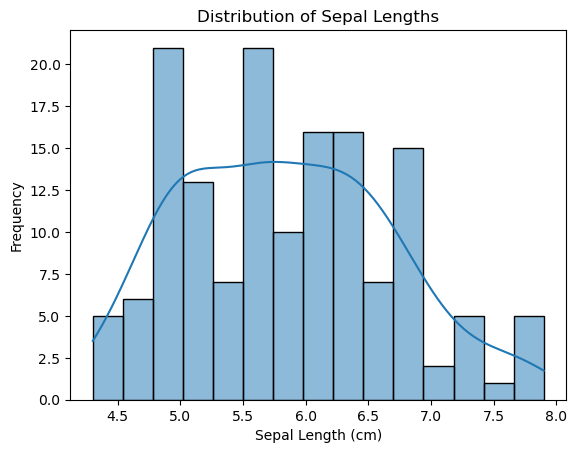

In [12]:
# Create a histogram
sns.histplot(data=iris, x="sepal_length", kde=True, bins=15) # You can adjust the number of bins

# Add labels and a title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of Sepal Lengths")

# Show the plot
plt.show()

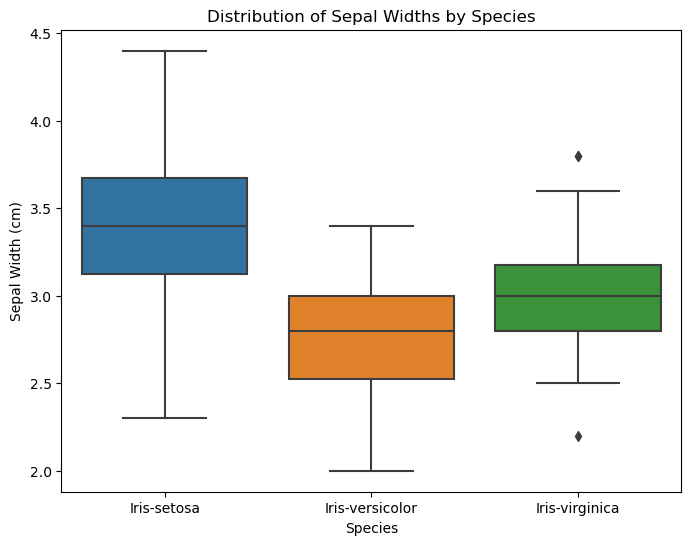

In [13]:
# Create a box plot or violin plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Box plot
sns.boxplot(data=iris, x="species", y="sepal_width")
# Violin plot
# sns.violinplot(data=iris, x="species", y="sepal_width")

# Add labels and a title
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.title("Distribution of Sepal Widths by Species")

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

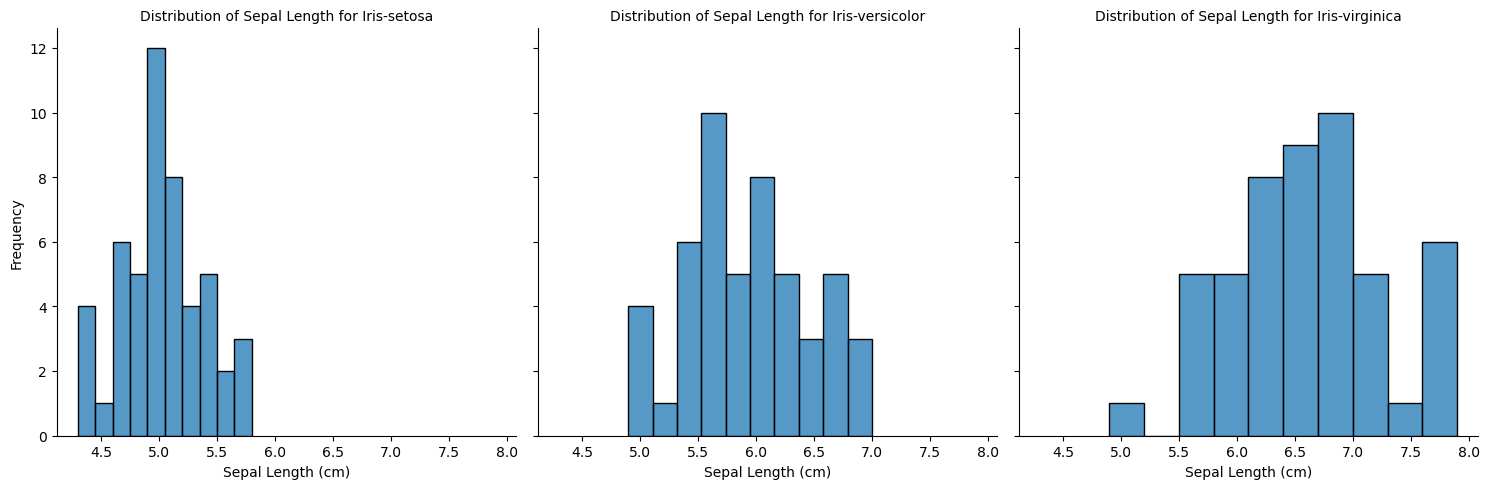

Mode (most common value) for each species:
species
Iris-setosa        5.0
Iris-versicolor    5.5
Iris-virginica     6.3
Name: sepal_length, dtype: float64


In [14]:
# Create a bar chart or histogram for sepal length for each species
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a facet grid for separate plots for each species
g = sns.FacetGrid(iris, col="species", height=5)
g.map(sns.histplot, "sepal_length", kde=False, bins=10)  # Adjust the number of bins as needed

# Add labels and a title
g.set_axis_labels("Sepal Length (cm)", "Frequency")
g.set_titles("Distribution of Sepal Length for {col_name}")

# Show the plots
plt.show()

# Calculate the mode for each species
modes = iris.groupby("species")["sepal_length"].apply(lambda x: x.mode().values[0])
print("Mode (most common value) for each species:")
print(modes)


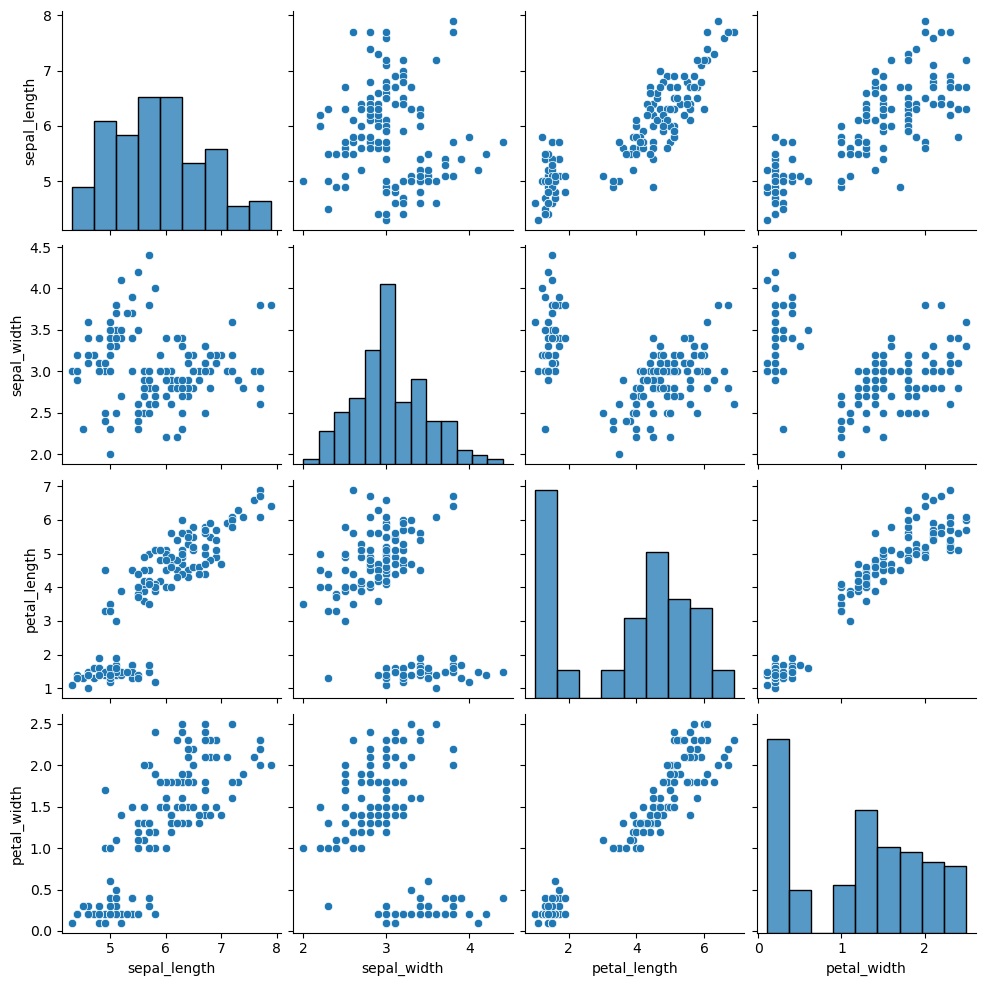

In [15]:
sns.pairplot(iris)

C:\Users\Sonal Lokhande\AppData\Local\Temp\ipykernel_13564\1679202494.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr())


<Axes: >

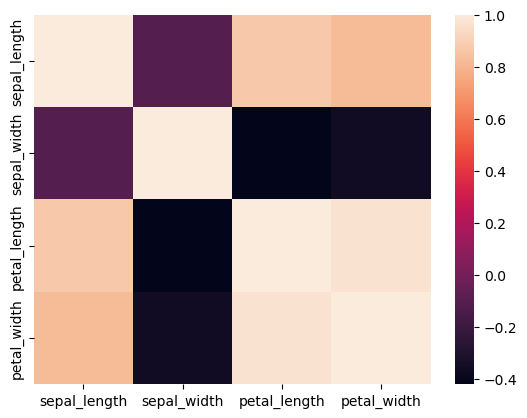

In [16]:
sns.heatmap(iris.corr())

In [17]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
iris.species=[sp[i] for i in iris.species]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [18]:
X=iris.iloc[:,0:4]
y=iris.iloc[:,4]

In [19]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Feature Scaling (optional but can help with some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [21]:
# Model Selection and Training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
# Model Evaluation
y_pred = model.predict(X_test)

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [24]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# KNN

In [28]:
# Create a KNN classifier with a chosen value of k (number of neighbors)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
#Make Predictions
y_pred = knn_classifier.predict(X_test)

In [31]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [32]:
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Decision Tree

In [36]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
y_pred = dt_classifier.predict(X_test)


In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [39]:
# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [40]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Decision Tree'],
    'Score': [accuracy,accuracy,accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,1.0
1,Logistic Regression,1.0
2,Decision Tree,1.0
